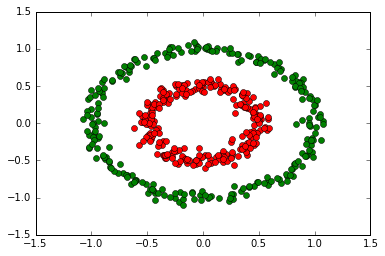

In [69]:
"""Kernel K-means"""

import numpy as np

def distance(x1, x2):
    return np.sum((x1 - x2) ** 2)

def circular_kernel(x1, x2, center=None):
    if center is None:
        center = np.zeros(len(x1))
    dist1 = distance(x1, center)
    dist2 = distance(x2, center)
    return 1.0 - min(dist1, dist2) / max(dist1, dist2)

class KernelKMeans(object):
        
    def kernel_matrix(self, data, kernel_func):
        n = data.shape[0]
        K = np.zeros((n,n), dtype=float)
        for i in range(n):
            for j in range(n):
                K[i,j] = kernel_func(data[i], data[j])
        return K

    def fit(self, X, k, kernel_func, max_itr=100, tol=1e-3):
        # N
        N = X.shape[0]
        # NxN matrix from kernel funnction element wise
        K = self.kernel_matrix(X, kernel_func)
        # equal weightage to all
        cluster_weights = np.ones(N)        
        # Assignments : random assignments to begin with
        A = np.random.randint(k, size=N)

        for it in xrange(max_itr): # stuck up between 2 local minimas, abort after maxiter
            # N x k matrix that stores distance between every point and cluster center
            dist = self.compute_dist(K, k, A, sw=cluster_weights)
            oldA, A = A, dist.argmin(axis=1)
            # Check if it is conveged
            n_same = np.sum(np.abs(A - oldA) == 0)
            if 1 - float(n_same) / N < tol:
                print "Converged at iteration:", it + 1
                break
        return A

    def compute_dist(self, K, k, A, sw):
        """Compute a n_samples x n_clusters distance matrix using the 
        kernel trick."""
        dist = np.zeros((K.shape[0], k))
        for cl in xrange(k):
            mask = A == cl
            if np.sum(mask) == 0:
                raise Error("ERROR:cluster '%d' is empty. Looks like we cant make %d clusters" % (cl, k))
            N_ = sw[mask].sum()
            KK = K[mask][:, mask] 
            dist[:, cl] +=  np.sum(np.outer(sw[mask], sw[mask]) * KK / (N_*N_))          
            dist[:, cl] -= 2 * np.sum(sw[mask] * K[:, mask], axis=1) / N_
        return dist

if __name__ == '__main__':
  
    blob_file = '../data/hw5_blob.csv'
    circle_file = '../data/hw5_circle.csv'

    blob_data = np.genfromtxt(blob_file, delimiter=',')
    circle_data = np.genfromtxt(circle_file, delimiter=',')
    
    
    import matplotlib.pyplot as plt
    %matplotlib inline
    
    data = circle_data
    k = 2
    km = KernelKMeans()
    func = circular_kernel
    clusters = km.fit(data, k, func)
    colors = ['r', 'g', 'b', 'y', 'c', 'k']
    for i in range(k):
        cpts = data[clusters == i]
        plt.plot(*zip(*cpts), marker='o', color=colors[i], ls='')
        i += 1
    plt.show()